In [50]:
import pandas as pd
import seaborn as sn

In [51]:
df = pd.read_csv('../../text-analysis-simplification.csv')

In [52]:
mean_columns = ['sentence_length','Kincaid', 'ARI',	'Coleman-Liau',	'FleschReadingEase', 'GunningFogIndex', 'LIX',	'DaleChallIndex']
sum_columns = ['tobeverb',	'auxverb',	'conjunction',	'pronoun',	'preposition',	'nominalization',	'interrogative',	'article',	'subordination']

In [53]:
df.head()

,sentence,source,title,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,...,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
0,Controle op gebruik algoritmische surveillance...,AbstractiveSummEP,AISurveillance,8,12.425714,16.385714,22.811356,18.444286,14.228571,64.142857,...,19.773700,0,0,0,0,0,0,0,0,0
1,Exploratie door lens relationele ethiek.,AbstractiveSummEP,AISurveillance,6,12.320000,14.040000,19.440697,15.640000,10.000000,45.000000,...,16.516500,0,0,0,0,0,1,0,0,0
2,Technologische ontwikkelingen sinds einde 20st...,AbstractiveSummEP,AISurveillance,15,19.370000,19.549286,24.504744,-18.875000,17.028571,49.714286,...,20.120900,0,0,0,0,0,0,0,0,0
3,Big data en AI in 21ste eeuw interessant voor ...,AbstractiveSummEP,AISurveillance,11,6.010000,4.294000,7.111812,69.785000,12.000000,30.000000,...,16.764500,0,0,0,0,0,1,0,0,0
4,Gebruik technologie door politie als algoritmi...,AbstractiveSummEP,AISurveillance,8,17.482857,20.422857,27.851228,-17.812857,25.657143,78.428571,...,17.517986,0,0,0,0,0,1,0,0,0


In [60]:
df.head(4)

,sentence,source,title,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,...,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
0,Controle op gebruik algoritmische surveillance...,AbstractiveSummEP,AISurveillance,8,12.425714,16.385714,22.811356,18.444286,14.228571,64.142857,...,19.7737,0,0,0,0,0,0,0,0,0
1,Exploratie door lens relationele ethiek.,AbstractiveSummEP,AISurveillance,6,12.320000,14.040000,19.440697,15.640000,10.000000,45.000000,...,16.5165,0,0,0,0,0,1,0,0,0
2,Technologische ontwikkelingen sinds einde 20st...,AbstractiveSummEP,AISurveillance,15,19.370000,19.549286,24.504744,-18.875000,17.028571,49.714286,...,20.1209,0,0,0,0,0,0,0,0,0
3,Big data en AI in 21ste eeuw interessant voor ...,AbstractiveSummEP,AISurveillance,11,6.010000,4.294000,7.111812,69.785000,12.000000,30.000000,...,16.7645,0,0,0,0,0,1,0,0,0


In [57]:
sentence_info = df[['source', 'Kincaid','ARI','Coleman-Liau','FleschReadingEase','GunningFogIndex','LIX','SMOGIndex','RIX', 'DaleChallIndex']]

grouped_mean = sentence_info.groupby(['source']).mean()
grouped_size = sentence_info.groupby(['source']).size()

result = grouped_mean.join(grouped_size.to_frame(name='size'))

result.style.to_latex()

'\\begin{tabular}{lrrrrrrrrrr}\n & Kincaid & ARI & Coleman-Liau & FleschReadingEase & GunningFogIndex & LIX & SMOGIndex & RIX & DaleChallIndex & size \\\\\nsource &  &  &  &  &  &  &  &  &  &  \\\\\nAbstractiveSumm & 12.214489 & 14.143684 & 16.954365 & 33.024945 & 15.766468 & 51.026363 & 12.568224 & 5.107728 & 18.875007 & 854 \\\\\nAbstractiveSummEP & 12.489181 & 14.508652 & 16.724177 & 33.909959 & 16.189803 & 51.395572 & 13.108607 & 5.553066 & 18.948026 & 848 \\\\\nChatGPT & 14.843680 & 17.410334 & 18.013121 & 25.899709 & 19.148322 & 57.607169 & 15.502751 & 7.648649 & 19.404928 & 74 \\\\\nExtractiveSum & 14.958702 & 18.064627 & 17.036134 & 30.407899 & 19.411738 & 59.993841 & 15.587931 & 8.322981 & 17.962782 & 161 \\\\\nGPT3Custom & 14.118087 & 16.374829 & 17.877664 & 26.461727 & 17.669313 & 55.918783 & 14.407876 & 7.039216 & 19.214089 & 51 \\\\\nGPT3CustomLS & 13.735074 & 15.293363 & 17.023967 & 27.313137 & 16.090558 & 52.621290 & 13.109405 & 6.093750 & 18.897636 & 32 \\\\\nHybridSum 

In [58]:
result

,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,size
source,,,,,,,,,,
AbstractiveSumm,12.214489,14.143684,16.954365,33.024945,15.766468,51.026363,12.568224,5.107728,18.875007,854
AbstractiveSummEP,12.489181,14.508652,16.724177,33.909959,16.189803,51.395572,13.108607,5.553066,18.948026,848
ChatGPT,14.843680,17.410334,18.013121,25.899709,19.148322,57.607169,15.502751,7.648649,19.404928,74
ExtractiveSum,14.958702,18.064627,17.036134,30.407899,19.411738,59.993841,15.587931,8.322981,17.962782,161
GPT3Custom,14.118087,16.374829,17.877664,26.461727,17.669313,55.918783,14.407876,7.039216,19.214089,51
GPT3CustomLS,13.735074,15.293363,17.023967,27.313137,16.090558,52.621290,13.109405,6.093750,18.897636,32
HybridSum,13.185045,15.259596,18.405982,26.223600,16.397969,53.424869,13.121571,5.424242,18.839952,165
HybridSumEP,12.894668,14.956050,16.967600,32.733518,17.034435,52.747106,13.911769,5.924528,18.873224,212
Original,13.651549,16.132239,16.510241,33.305491,17.664600,55.444667,14.306922,6.902256,17.022710,133


In [44]:
sentence_info = df[['source','tobeverb','auxverb','conjunction','pronoun','preposition', 'nominalization', 'interrogative','article','subordination']]

grouped_sum = sentence_info.groupby(['source']).sum()
grouped_size = sentence_info.groupby(['source']).size()

result = grouped_sum.join(grouped_size.to_frame(name='size'))

for i in sentence_info.columns[1:]:
    result[i] = result[i] / result['size']

result.style.to_latex()

'\\begin{tabular}{lrrrrrrrrrr}\n & tobeverb & auxverb & conjunction & pronoun & preposition & nominalization & interrogative & article & subordination & size \\\\\nsource &  &  &  &  &  &  &  &  &  &  \\\\\nAbstractiveSumm & 0.309133 & 0.559719 & 0.008197 & 0.086651 & 0.117096 & 0.530445 & 0.019906 & 0.183841 & 0.051522 & 854 \\\\\nAbstractiveSummEP & 0.341981 & 0.584906 & 0.005896 & 0.082547 & 0.133255 & 0.558962 & 0.015330 & 0.194575 & 0.053066 & 848 \\\\\nChatGPT & 0.418919 & 1.175676 & 0.000000 & 0.108108 & 0.189189 & 0.675676 & 0.000000 & 0.270270 & 0.054054 & 74 \\\\\nExtractiveSum & 0.453416 & 0.776398 & 0.000000 & 0.118012 & 0.198758 & 0.763975 & 0.024845 & 0.236025 & 0.043478 & 161 \\\\\nGPT3Custom & 0.450980 & 0.803922 & 0.000000 & 0.078431 & 0.196078 & 0.607843 & 0.000000 & 0.098039 & 0.137255 & 51 \\\\\nGPT3CustomLS & 0.593750 & 0.937500 & 0.031250 & 0.062500 & 0.156250 & 0.656250 & 0.000000 & 0.062500 & 0.187500 & 32 \\\\\nHybridSum & 0.351515 & 0.612121 & 0.000000 & 0.060

* Kincaid: This metric measures the US grade level required to understand the text.
* ARI: This metric also measures the US grade level required to understand the text.
* Coleman-Liau: This metric measures the US grade level required to understand the text.
* Flesch Reading Ease: This metric measures how easy or difficult a text is to read. The higher the score, the easier it is to read.
* Gunning Fog Index: This metric measures the years of formal education required to understand the text.
* LIX: This metric measures the complexity of a text by dividing the number of words by the number of sentences and adding the number of long words (more than six letters) per 100 words.
* SMOG Index: This metric measures the years of education required to understand the text.
* RIX: This metric measures how complex a text is by dividing long sentences (more than 10 words) by short sentences (less than 10 words).
* Dale-Chall Index: This metric measures how easy or difficult a text is to read. The higher the score, the more difficult it is to read.

In [8]:
df.groupby(['title']).mean()

,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
title,,,,,,,,,,,,,,,,,,,
AISurveillance,20.324597,14.117314,16.631610,18.194719,26.084453,17.458188,55.392121,14.040032,6.647177,19.034196,0.336694,0.824597,0.002016,0.074597,0.102823,0.604839,0.022177,0.215726,0.044355
BelgieVsNederland,16.865031,12.453262,14.684104,17.485585,31.617790,15.639192,51.096720,12.370965,5.081800,18.807813,0.282209,0.292434,0.006135,0.044990,0.139059,0.464213,0.006135,0.188139,0.006135
Pensioenhervorming,17.595912,12.821253,14.779408,17.233128,30.946672,16.758375,52.186352,13.368121,5.548742,19.087558,0.242138,0.411950,0.000000,0.124214,0.127358,0.616352,0.006289,0.240566,0.047170
TheImpactofAIOnJobsAndSexualDiscrimination,21.741053,14.301106,16.125715,17.229404,26.683124,17.604144,55.605841,14.350752,6.911579,17.984009,0.646316,0.976842,0.016842,0.105263,0.105263,0.741053,0.008421,0.174737,0.155789
VirtualRealityStotterTherapie,17.035971,10.708384,12.828938,15.001918,45.098383,15.426166,49.696617,12.631691,5.075540,18.784585,0.330935,0.672662,0.003597,0.062950,0.188849,0.492806,0.039568,0.172662,0.037770


Hypothese 1:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen hebben een significant eenvoudigere leesgraad vergeleken met de oorspronkelijke wetenschappelijke artikelen

Hypothese 2:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen zijn minstens even eenvoudig dan handmatig vereenvoudigde artikelen

Hypothese 3:

de gebruikte syntactische structuren in een automatisch vereenvoudigd wetenschappelijk artikel zijn minstens even eenvoudig als het aantal in een handmatig vereenvoudigd wetenschappelijk artikel

Hypothese 4:

iets met samenvatting

Hypothese 5:

iets met het prototype

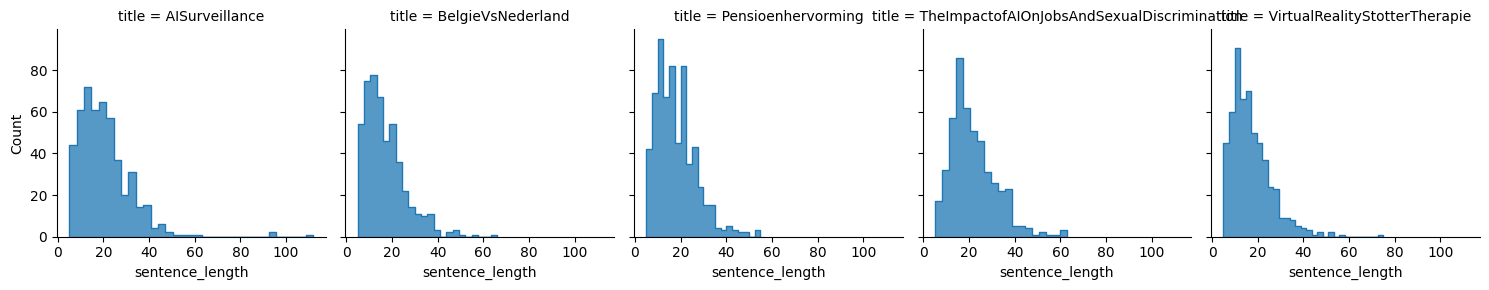

In [9]:
g = sn.FacetGrid(df, col='title')
g.map(sn.histplot, 'sentence_length', element="step")

<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

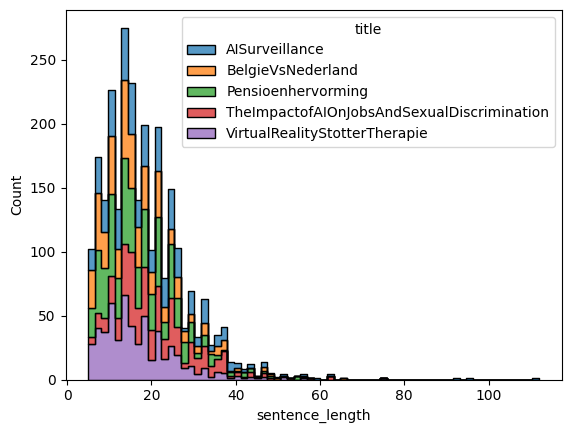

In [10]:
sn.histplot(data=df, x='sentence_length', hue='title', multiple="stack", element="step")

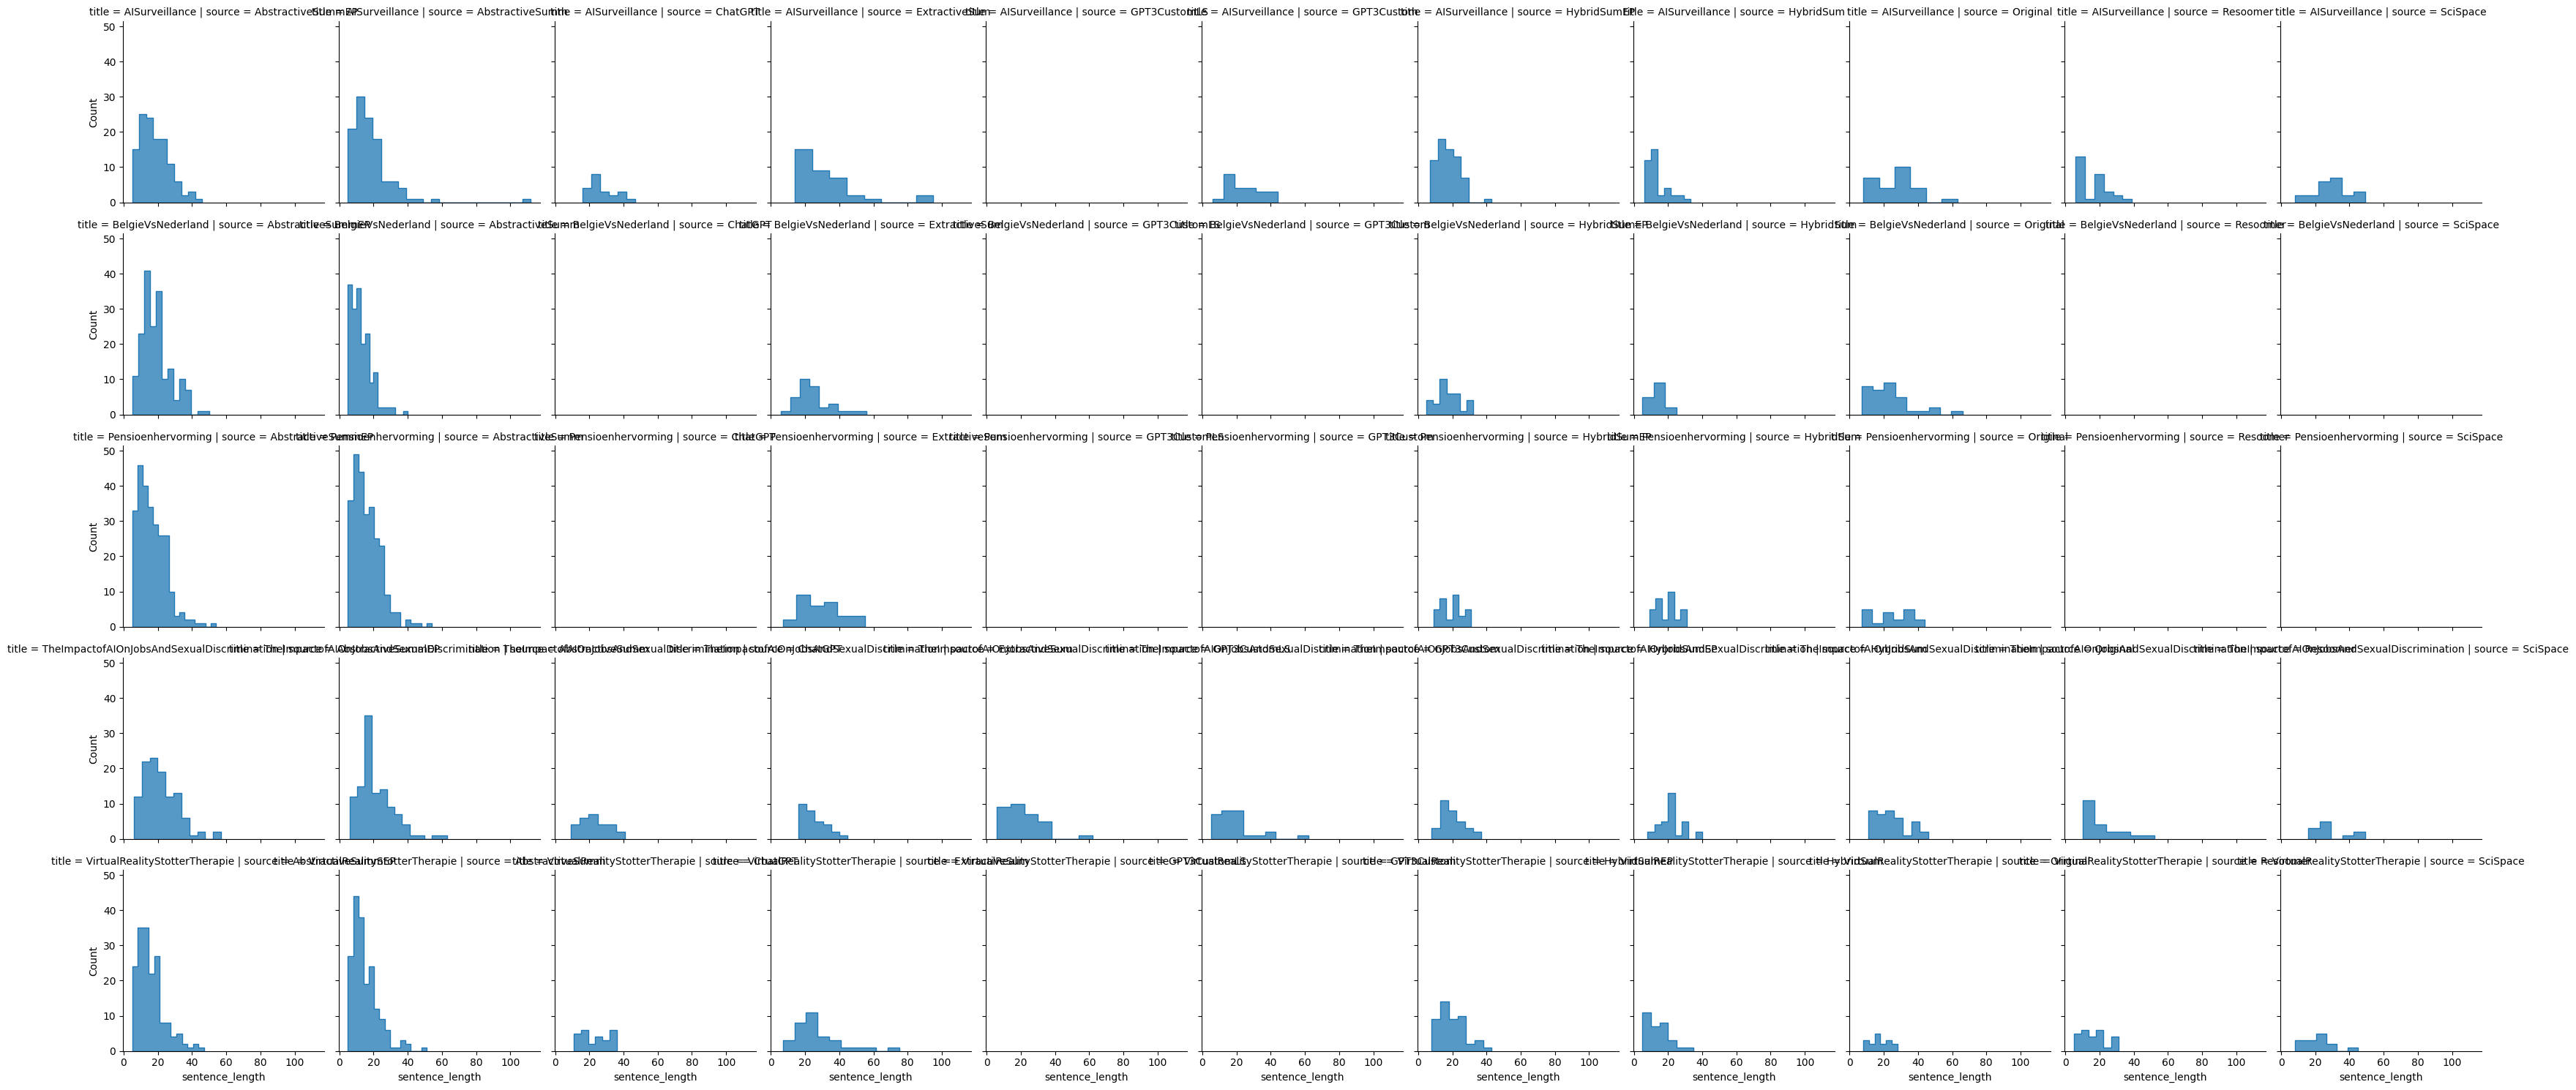

In [14]:
g = sn.FacetGrid(df, col='source', row='title')
g.map(sn.histplot, 'sentence_length', element="step")

<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

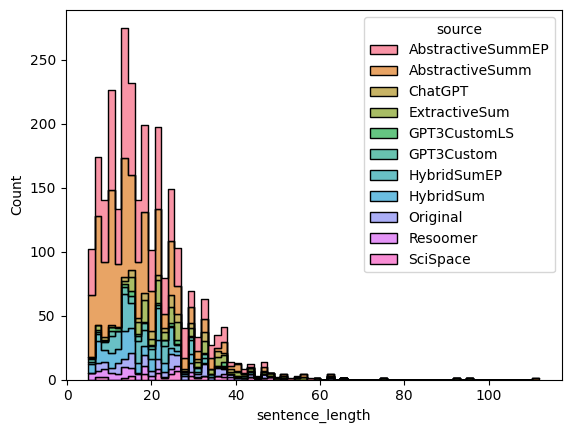

In [11]:
sn.histplot(data=df, x='sentence_length', hue='source', multiple="stack", element="step")

<AxesSubplot:xlabel='FleschReadingEase', ylabel='sentence_length'>

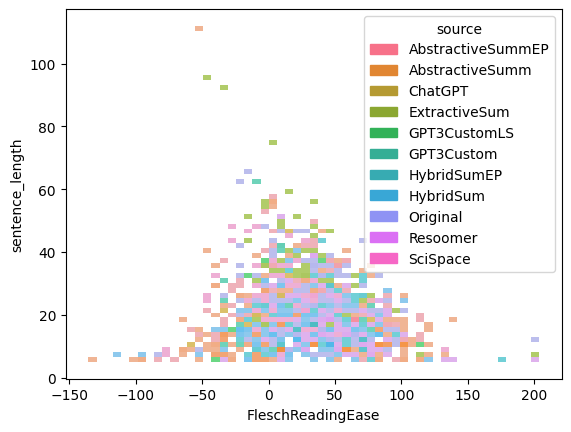

In [12]:
sn.histplot(data=df, x='FleschReadingEase', y='sentence_length', hue='source')